# A Simple Example of Clustering 

You are given much more country data. Using the same methodology as the one in the lecture, group all the countries in 2 clusters. 

Try with other numbers of clusters and see if they match your expectations. Maybe 7 is going to be a cool one!

Plot the data using the <i> c </i> parameter to separate the data by the clusters we defined.  

<i> Note: c stands for color <i>

## Import the relevant libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set the styles to Seaborn
sns.set()
# Import the KMeans module so we can perform k-means clustering with sklearn
from sklearn.cluster import KMeans

## Load the data

Load data from the csv file: <i> 'Countries.csv'</i>.


In [100]:
# Load the country clusters data
data = pd.read_csv('Countries-exercise.csv')

## Plot the data

Plot the <i>'Longtitude'</i> and <i>'Latitude'</i> columns. 

<function matplotlib.pyplot.show(close=None, block=None)>

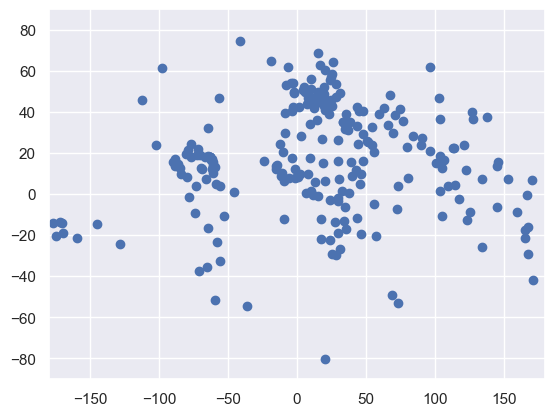

In [103]:
# Use the simplest code possible to create a scatter plot using the longitude and latitude
# Note that in order to reach a result resembling the world map, we must use the longitude as y, and the latitude as x
plt.scatter(data['Longitude'],data['Latitude'])
# Set limits of the axes, again to resemble the world map
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Select the features

Create a copy of that data and remove all parameters apart from <i>Longitude</i> and <i>Latitude</i>.

In [106]:
# iloc is a method used to 'slice' data 
# 'slice' is not technically correct as there are methods 'slice' which are a bit different
# The term used by pandas is 'selection by position'
# The first argument of identifies the rows we want to keep
# The second - the columns
# When choosing the columns, e.g. a:b, we will keep columns a,a+1,a+2,...,b-1 ; so column b is excluded
x = data.iloc[:,1:3]
# for this particular case, we are choosing columns 1 and 2
# Note column indices in Python start from 0
x

,Longitude,Latitude
0,-69.982677,12.520880
1,66.004734,33.835231
2,17.537368,-12.293361
3,-63.064989,18.223959
4,20.049834,41.142450
...,...,...
236,-172.164851,-13.753243
237,47.586762,15.909280
238,25.083901,-29.000341
239,27.774759,-13.458242


## Clustering

Assume there are only two clusters. 

In [109]:
# Create an object (which we would call kmeans)
# The number in the brackets is K, or the number of clusters we are aiming for
kmeans = KMeans(4)

In [110]:
# Fit the input data, i.e. cluster the data in X in K clusters
kmeans.fit(x)

KMeans(n_clusters=4)

### Clustering Resutls

In [112]:
# Create a variable which will contain the predicted clusters for each observation
identified_clusters = kmeans.fit_predict(x)
# Check the result
identified_clusters

array([1, 0, 0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 3, 0, 1, 3, 2, 0, 0, 2, 2, 2,
       3, 2, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 3, 3, 0, 0, 2, 1, 3, 2, 0,
       0, 0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 1, 2, 1, 0, 0,
       2, 2, 0, 2, 3, 1, 2, 2, 3, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1,
       3, 1, 3, 0, 1, 2, 1, 2, 3, 2, 0, 3, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0,
       3, 0, 0, 0, 0, 3, 1, 1, 3, 2, 0, 3, 0, 2, 2, 1, 2, 0, 0, 2, 2, 2,
       3, 1, 2, 2, 2, 0, 0, 1, 3, 2, 2, 2, 3, 2, 3, 3, 0, 2, 1, 0, 0, 3,
       0, 3, 2, 3, 2, 1, 1, 2, 2, 0, 3, 3, 0, 0, 1, 1, 1, 3, 3, 3, 2, 1,
       3, 2, 1, 0, 1, 0, 2, 3, 0, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 1, 2, 0,
       0, 1, 2, 2, 1, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 3, 0, 0, 3, 1, 1, 2,
       2, 3, 0, 0, 2, 1, 1, 0, 2, 1, 1, 1, 1, 3, 3, 1, 1, 0, 0, 0, 0],
      dtype=int32)

In [113]:
# Create a copy of the data
data_with_clusters = data.copy()
# Create a new Series, containing the identified cluster for each observation
data_with_clusters['Cluster'] = identified_clusters
# Check the result
data_with_clusters

,name,Longitude,Latitude,Cluster
0,Aruba,-69.982677,12.520880,1
1,Afghanistan,66.004734,33.835231,0
2,Angola,17.537368,-12.293361,0
3,Anguilla,-63.064989,18.223959,1
4,Albania,20.049834,41.142450,2
...,...,...,...,...
236,Samoa,-172.164851,-13.753243,1
237,Yemen,47.586762,15.909280,0
238,South Africa,25.083901,-29.000341,0
239,Zambia,27.774759,-13.458242,0


Did you remember to use the <i> c </i> parameter to separate the data by the clusters we defined?

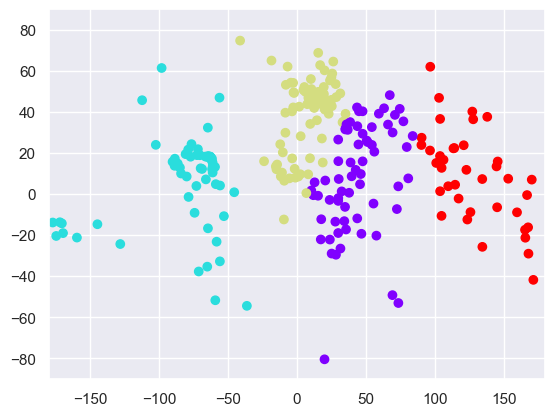

In [115]:
# Plot the data using the longitude and the latitude
# c (color) is an argument which could be coded with a variable 
# The variable in this case has values 0,1,2, indicating to plt.scatter, that there are three colors (0,1,2)
# All points in cluster 0 will be the same colour, all points in cluster 1 - another one, etc.
# cmap is the color map. Rainbow is a nice one, but you can check others here: https://matplotlib.org/users/colormaps.html
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

If you haven't, go back and play around with the number of clusters. 

Try 3, 7 and 8 and see if the results match your expectations!